# Régression & optimisation par descente de gradient

Ce tp a deux objectifs: 
 - acquérir les connaissances de base pour faire face au problème de la régression, c'est à dire de l'estimation d'un score réel correpondant à une situation,
 - mieux comprendre la descente de gradient

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A. Génération de données jouet & construction d'une solution analytique

### A.1 Génération de données jouet 

[tout le code est donné... A vous de le comprendre]

Dans un premier temps, générons des données jouets paramétriques:
- $N$: nombre de points à générer
  - $x \in [0, 1]$ tirage avec un simple rand() ou un linspace() -au choix-
  - Si vous optez pour un tirage aléatoire des abscisses, triez les points pour simplifier les traitements ultérieurs
- $y=ax+b+\epsilon, \epsilon \sim \mathcal N(0,\sigma^2)$
  - Rappel : en multipliant un tirage aléatoire selon une gaussienne centrée réduite par $\sigma$ on obtient le bruit décrit ci-dessus

Afin de travailler sur les bonnes pratiques, nous distinguerons un ensemble d'apprentissage et un ensemble de test.
Les deux sont tirés selon la même distribution. L'ensemble de test comptera -arbitrairement- 1000 points.

In [6]:
def gen_data_lin(a, b, sig, N=500, Ntest=1000):
    X_train = np.sort(np.random.rand(N)) # sort optionnel, mais ça aide pour les plots
    X_test  = np.sort(np.random.rand(Ntest)) 
    Y_train = a*X_train + b + np.random.randn(N)*sig
    Y_test  = a*X_test + b + np.random.randn(Ntest)*sig
    return X_train, Y_train, X_test, Y_test

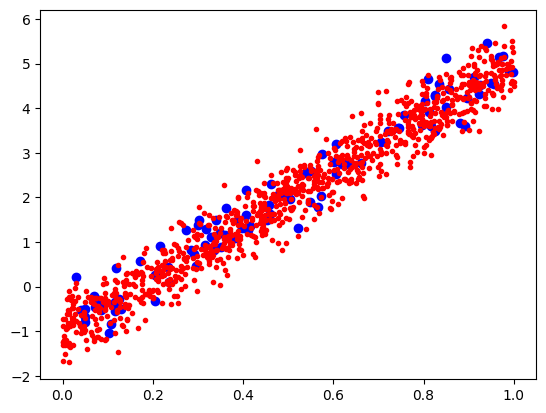

In [7]:
# génération de données jouets:
a = 6.
b = -1.
N = 100
sig = .4 # écart type

X_train, y_train, X_test, y_test = gen_data_lin(a, b, sig, N)

plt.figure()
plt.plot(X_test, y_test, 'r.')
plt.scatter(X_train, y_train, c='b')

### A.2. Formulation au sens des moindres carrés

Nous partons directement sur une écriture matricielle. Du coup, il est nécessaire de construire la matrice enrichie $X$:
    $$X = \begin{pmatrix}
                x_0 & 1\\
                \vdots & \vdots\\
                x_n & 1
                \end{pmatrix}
                 $$
Le code de la fonction d'enrichissement est donné ci-dessous.


L'idée de cet enrichissement est de simplifier le code suivant:
1. facilité de construction de la fonction linéaire:
$$ \hat Y = X \cdot w, \qquad X\in \mathbb R^{n\times 2}, \qquad w = \begin{pmatrix}a\\ b\end{pmatrix}
\in \mathbb R^{2}, \qquad \forall i,\  \hat y_i = a x_i + b$$
2. L'idée est de minimiser l'erreur au sens des moindres carrés $C$:
$$w^\star = \arg\min_w C(X,Y,w) = \arg\min_w \|Xe \cdot w - Y\|^2 $$
3. Trouver l'argmin = annuler la dérivée du gradient:
$$\arg\min_w \|X \cdot w - Y\|^2 \Leftrightarrow  \nabla_w C(X,Y,w) = 2 X^T (X \cdot w - Y) =0 \Leftrightarrow  X^T X \cdot w =  X^T Y $$ 
4. Le problème d'apprentissage revient alors à résoudre un système d'équations linéaires de la forme:
$$ A w = B $$
**Rappel des formules vues en cours/TD:**
$$ A=X^T X \in \mathbb R^{d\times d}$$
$$ B=X^T Y\in \mathbb R^{d} $$
Fonction de résolution: `np.linalg.solve(A,B)`
Vous devez obtenir la même solution que précédemment. 

In [5]:
def make_mat_lin_biais(X): # fonctionne pour un vecteur unidimensionel X
    N = len(X)
    return np.hstack((X.reshape(N,1),np.ones((N,1))))

In [40]:
Xe = make_mat_lin_biais(X_train)
# A compléter pour résoudre le problème d'apprentissage
w=np.linalg.solve(Xe.T@Xe,Xe.T@y_train)
print(w)

[ 5.95416586 -0.90341613]


### A.3. Evaluation des modèles

Il est nécessaire d'avoir une évaluation **quantitative** (critère d'erreur MSE -Mean Squared Error-, MAPE -Mean Average Percentage Error-, ...). Sur les exemples simples, il est possible de tracer le résultat pour une analyse **qualitative**.

In [20]:
# Evaluation quantitative

def erreur_mc(y, yhat):
    return ((y-yhat)**2).mean()

# estimation des sorties avec les paramètres que vous avez calculé
yhat_train = Xe@w
yhat_test  = make_mat_lin_biais(X_test)@w
print(yhat_test,yhat_train)
print('Erreur moyenne au sens des moindres carrés (train):', erreur_mc(yhat_train, y_train))
print('Erreur moyenne au sens des moindres carrés (test):', erreur_mc(yhat_test, y_test))

[-0.90053802 -0.90043555 -0.89664881 -0.89626891 -0.89421691 -0.89219982
 -0.88990005 -0.88810474 -0.88071787 -0.87251587 -0.86626078 -0.86471249
 -0.85798703 -0.85707906 -0.85480587 -0.8485633  -0.84743984 -0.84578372
 -0.8377851  -0.8313164  -0.82665648 -0.82302137 -0.81870844 -0.81768912
 -0.81740623 -0.81680127 -0.81314276 -0.81241363 -0.80625688 -0.80435851
 -0.79495425 -0.77939512 -0.77650216 -0.77375511 -0.77320872 -0.77108478
 -0.76547666 -0.76231824 -0.76126533 -0.76009671 -0.74139769 -0.74100802
 -0.73454981 -0.72605835 -0.72242586 -0.72068787 -0.70366324 -0.6977553
 -0.69189547 -0.67879563 -0.66552094 -0.65441121 -0.64382729 -0.62555854
 -0.62423556 -0.61458731 -0.61439832 -0.60645273 -0.60573473 -0.60159091
 -0.5959201  -0.58798991 -0.57662741 -0.56574127 -0.54786708 -0.5344354
 -0.53147671 -0.52936001 -0.51932356 -0.5131117  -0.50544627 -0.4930377
 -0.48720081 -0.48284681 -0.48244204 -0.47573579 -0.47221597 -0.46218114
 -0.45953649 -0.45632496 -0.45362425 -0.45141005 -0.44

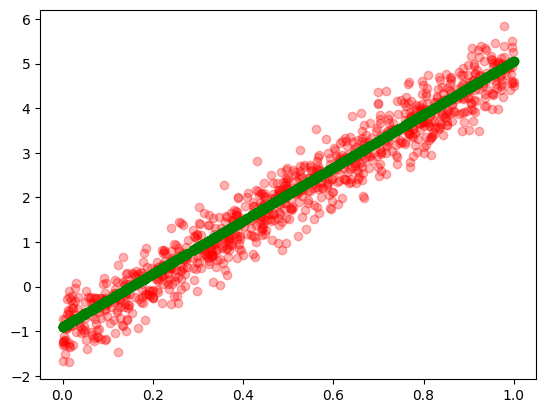

In [15]:
# Evaluation qualitative

plt.figure()
plt.scatter(X_test, y_test, c='r', alpha=0.3)
plt.scatter(X_test, yhat_test, c='g')
plt.plot(X_test, yhat_test, 'g--')


## B. Construction de modèles non linéaire

Dans le formalisme mis en place ci-dessus, il est très facile de passer à des modèles non linéaire, par exemple polynomiaux.

1. Générer des données polynomiales pour valider votre approche
2. A partir des données brutes $\begin{pmatrix}x_0& x_1& \ldots& x_n\end{pmatrix}$, construction d'une matrice enrichie
 $$X = \begin{pmatrix}
                x_0^2 & x_0 & 1\\
                \vdots & \vdots\\
                x_n^2  & x_n & 1
                \end{pmatrix}
                 $$

3. Tout est fait ! 
$$ \hat Y = X \cdot w, \qquad X\in \mathbb R^{n\times 3}, \qquad w = \begin{pmatrix}a\\ b\\ c\end{pmatrix}
\in \mathbb R^{2}, \qquad \forall i,\  \hat y_i = a x_i^2 + b x_i +c$$

En reprennant la formulation matricielle ci-dessus, on voit que naturellement $w=\begin{pmatrix}a\\ b\\ c\end{pmatrix}$ permet de définir les coefficients du polynome.

TRANSFORMER les données $\Rightarrow$ TRANSFORMATION automatique du modèle

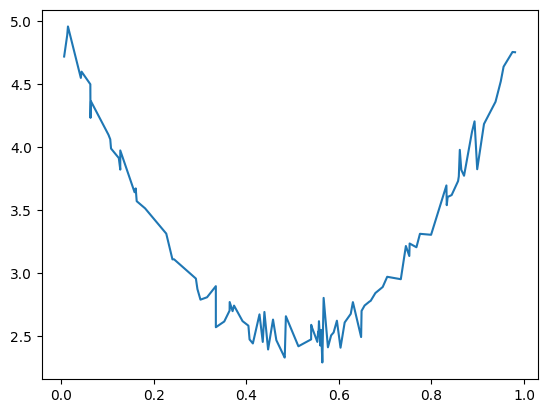

In [31]:
def gen_data_poly2(a, b, c, sig, N=500, Ntest=1000):
    '''
    Tire N points X aléatoirement entre 0 et 1 et génère y = ax^2 + bx + c + eps
    eps ~ N(0, sig^2)
    '''
    X_train = np.sort(np.random.rand(N))
    X_test  = np.sort(np.random.rand(Ntest))
    y_train = a*X_train**2+b*X_train+c+np.random.randn(N)*sig
    y_test  = a*X_test**2 +b*X_test +c+np.random.randn(Ntest)*sig
    return X_train, y_train, X_test, y_test

Xp_train, yp_train, Xp_test, yp_test = gen_data_poly2(10, -10, 5, 0.1, N=100, Ntest=100)
plt.figure()
plt.plot(Xp_train, yp_train)

Erreur moyenne au sens des moindres carrés (train): 0.009333539617534472
Erreur moyenne au sens des moindres carrés (test): 0.012037876572459067


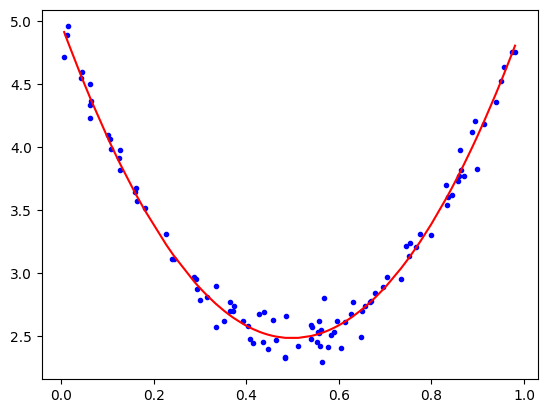

In [32]:
def make_mat_poly_biais(X): # fonctionne pour un vecteur unidimensionel X
    N=len(X)
    return np.hstack(((X.reshape(N,1))**2,X.reshape(N,1),np.ones((N,1))))

Xe   = make_mat_poly_biais(Xp_train)
Xe_t = make_mat_poly_biais(Xp_test)
w    = w=np.linalg.solve(Xe.T@Xe,Xe.T@yp_train)

yhat   = Xe@w
yhat_t = Xe_t@w
print('Erreur moyenne au sens des moindres carrés (train):', erreur_mc(yhat, yp_train))
print('Erreur moyenne au sens des moindres carrés (test):', erreur_mc(yhat_t, yp_test))

plt.figure()
plt.plot(Xp_train, yp_train, 'b.')
plt.plot(Xp_train, yhat, 'r')

# Fonction de coût & optimisation par descente de gradient

Nous allons maintenant résoudre le problème de la régression par minimisation d'une fonction de coût:
$$ C = \sum_{i=1}^N (y_i - f(x_i))^2$$

Soit un problème avec des données $(x_i,y_i)_{i=1,\ldots,N}$, une fonction de décision/prédiction paramétrée par un vecteur $w$ et une fonction de cout à optimiser $C(w)$.
Notre but est de trouver les paramètres $w^\star$ minimisant la fonction de coût:
$$ w^\star = \arg\min_w C(w)$$

l'algorithme de la descente de gradient est le suivant (rappel):

 - $w_0 \leftarrow init$ par exemple : 0
 - boucle
     - $w_{t+1} \leftarrow w_{t} - \epsilon \nabla_w C(w_t)$

Compléter le squelette d'implémentation fourni ci-dessous:


In [41]:
# pour travailler en matrice: (re)construction de la matrice contenant les X et un biais
Xe = make_mat_lin_biais(Xp_train) # dataset linéaire, transformation lineaire des données
wstar = w
print(wstar)

def descente_grad_mc(X, y, eps=1e-4, nIterations=100):
    w = np.zeros(X.shape[1]) # init à 0
    allw = [w]
    for i in range(nIterations):
        w=w-eps*(2*X.T@(X@w-y))
        allw.append(w) # stockage de toutes les valeurs intermédiaires pour analyse
    allw = np.array(allw)
    return w, allw # la dernière valeur (meilleure) + tout l'historique pour le plot
    
w, allw = descente_grad_mc(Xe, y_train, eps=1e-4, nIterations=200)

[ 5.95416586 -0.90341613]


On s'intéresse ensuite à comprendre la descente de gradient dans l'espace des paramètres. Le code ci-dessous permet de tracer le cout pour un ensemble de paramètres (toutes les valeurs de paramètres prises par l'algorithmes au fil du temps).


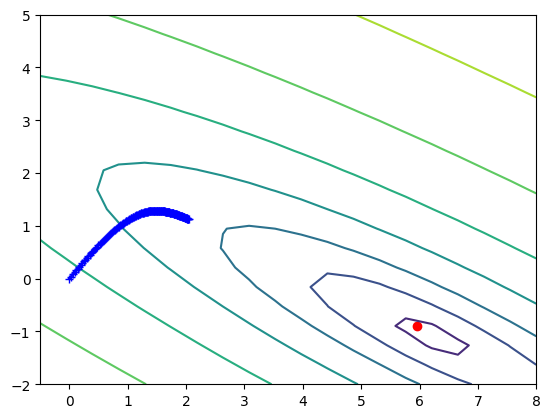

In [42]:
# tracer de l'espace des couts

def plot_parametres( allw, X, y, opti = [], ngrid = 20, extract_bornes=False):
    '''
    Fonction de tracer d'un historique de coefficients
    ATTENTION: ca ne marche qu'en 2D (évidemment)
    Chaque w doit contenir 2 valeurs
    
    Il faut fournir les données (X,y) pour calculer le cout associé 
    à un jeu de paramètres w
    ATTENTION X = forme matricielle des données
    '''
    w_min = [-0.5, -2] # bornes par défaut, uniquement pour notre cas d'usage
    w_max = [8, 5]
    if extract_bornes: # bornes générales
        w_min = np.min(allw,0) # trouver les bornes
        w_max = np.max(allw,0)
    # faire une grille régulière avec tous les couples possibles entre le min et le max
    w1range = np.linspace(w_min[0], w_max[0], ngrid)
    w2range = np.linspace(w_min[1], w_max[1], ngrid)
    w1,w2 = np.meshgrid(w1range,w2range)
    #
    # calcul de tous les couts associés à tous les couples de paramètres
    cost = np.array([[np.log(((X @ np.array([w1i,w2j])-y)**2).sum()) for w1i in w1range] for w2j in w2range])
    #
    plt.figure()
    plt.contour(w1, w2, cost)
    if len(opti) > 0:
        plt.scatter(opti[0], opti[1],c='r')
    plt.plot(allw[:,0],allw[:,1],'b+-' ,lw=2 )
    return
    
plot_parametres( allw, Xe, y_train, opti=wstar)
# plt.savefig('fig/grad_descente.png')

Vous devez obtenir un image de la forme :
![Descente de gradient](fig/grad_descente.png)

Tester différents jeux de paramètres pour mettre en évidence les phénomènes suivants:
 - Divergence du gradient
 - Convergence incomplète (trop lente ou pas assez d'itération)
 - Convergence idéale: pas de gradient suffisamment grand et nombre d'itérations bien choisi

[ 6.25169175 -1.11020819]


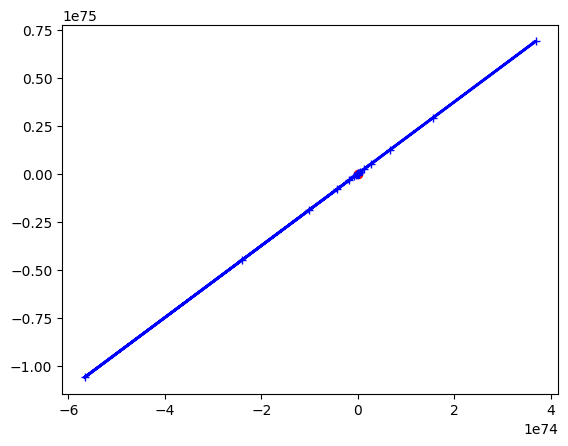

In [52]:
#Divergence
Xe = make_mat_lin_biais(Xp_train) 
wstar = np.linalg.solve(Xe.T@Xe,Xe.T@y_train)
print(wstar)
w, allw = descente_grad_mc(Xe, y_train, eps=1e-2, nIterations=400)
plot_parametres( allw, Xe, y_train, opti=wstar)

[ 6.25169175 -1.11020819]


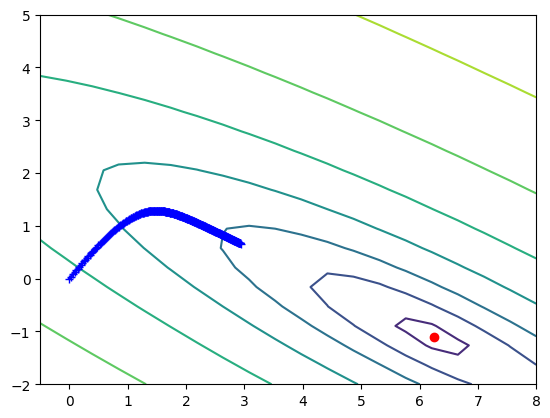

In [51]:
#trop lente convergence
Xe = make_mat_lin_biais(Xp_train) 
wstar = np.linalg.solve(Xe.T@Xe,Xe.T@y_train)
print(wstar)
w, allw = descente_grad_mc(Xe, y_train, eps=1e-4, nIterations=400)
plot_parametres( allw, Xe, y_train, opti=wstar)

[ 6.25169175 -1.11020819]


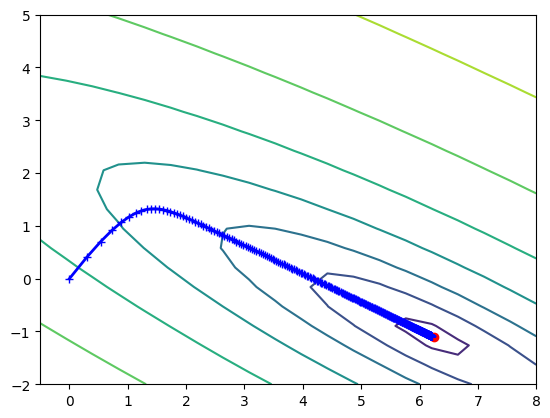

In [50]:
#Bonne convergence
Xe = make_mat_lin_biais(X_train) 
wstar = np.linalg.solve(Xe.T@Xe,Xe.T@y_train)
print(wstar)
w, allw = descente_grad_mc(Xe, y_train, eps=1e-3, nIterations=400)
plot_parametres( allw, Xe, y_train, opti=wstar)


# Passage sur des données réelles

Après avoir étudié trois manières de faire face au problème de la régression, nous proposons d'étudier un cas réel: la prédiction de la consommation des voitures en fonction de leurs caractéristiques.

Dans le cas présent, nous allons baser la solution sur la résolution analytique du problème des moindres carrés (`np.linalg.solve(A,B)`), qui semble la mieux adaptée au problème qui nous intéresse.

Le jeu de données est issu des datasets UCI, un répertoire parmi les plus connus en machine learning. Les données **sont déjà téléchargées et présentes dans le tme** mais vous voulez plus d'informations:
https://archive.ics.uci.edu/ml/datasets/auto+mpg

![voiture](fig/Large9.jpg)

Après avoir importé les données (fonction fournie), vous construirez une solution optimale et l'évaluerez au sens des moindres carrés en apprentissage et en test.


In [54]:
import pandas as pd
# Chargement des données
data = pd.read_csv('data/auto-mpg.data', delimiter='\s+', header=None) # comme np.loadtxt mais en plus robuste
# remplacement des données manquantes '?' => Nan pour travailler sur des nombres
data.iloc[:,[3]] = data.iloc[:,[3]].replace('?', None)
data.iloc[:,[3]] = data.iloc[:,[3]].astype(float)
# remplacement des valeurs manquantes par la moyenne
data.iloc[:,[3]] = data.iloc[:,[3]].fillna(data.iloc[:,[3]].mean())

print(data.head()) # visualiser ce qu'il y a dans les données

X = np.array(data.values[:,1:-2], dtype=np.float64)
y = np.array(data.values[:,0], dtype=np.float64)


      0  1      2      3       4     5   6  7                          8
0  18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1  15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2  18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3  16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4  17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino


In [ ]:
# separartion app/test
def separation_train_test(X, y, pc_train=0.75):
    # A compléter
    # 1) générer tous les index entre 0 et N-1
    # 2) mélanger la liste
    napp = int(len(y)*pc_train) # nb de points pour le train
    X_train, y_train = X[index[:napp]], y[index[:napp]]
    X_test, y_test   = X[index[napp:]], y[index[napp:]]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = separation_train_test(X, y, pc_train=0.75)

In [ ]:
# Résolution analytique

w = # A compléter
yhat   = # A compléter
yhat_t = # A compléter
print('Erreur moyenne au sens des moindres carrés (train):', erreur_mc(yhat, y_train))
print('Erreur moyenne au sens des moindres carrés (test):', erreur_mc(yhat_t, y_test))


In [ ]:
def plot_y(y_train, y_test, yhat, yhat_t):
    # tracé des prédictions:
    plt.figure()
    plt.subplot(211)
    plt.plot(y_test, label="GT")
    plt.plot(yhat_t, label="pred")
    plt.title('En test')
    plt.legend()
    plt.subplot(212)
    plt.plot(y_train, label="GT")
    plt.plot(yhat, label="pred")
    plt.title('En train')
    return
plot_y(y_train, y_test, yhat, yhat_t)

In [ ]:
# interprétation des poids
plt.figure()
plt.bar(np.arange(len(w)), w)

# Questions d'ouverture

## Sélection de caractéristiques

Quels sont les résultats obtenus en éliminant toutes les variables servent moins?

## Feature engineering

En étudiant la signification des variables du problèmes, on trouve:

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 

D'après la question précédente, le poids, l'année du modèle et le biais sont des facteurs important pour le calcul de la consommation... Jusqu'ici, nous n'avons pas pris en compte l'origine qui était difficile à coder.

### Encodage de l'origine

La variable origine est accessible de la manière suivante:

```
  origine = data.values[:,-2]
```
Il faut le faire au début du traitement pour bien conserver la séparation en l'apprentissage et le test.

Au moins les deux derniers facteurs discrets pourraient être traités différemment en one-hot encoding:
$$X_j = x \in \{1, \ldots, K\} \Rightarrow [0, 0, 1, 0] \in \{0, 1\}^K$$

La valeur $x$ donne l'index de la colonne non nulle.

### Encodage de l'année

Pour l'année, il est possible de procéder de la même manière, mais il préférable de découper les années en 10 catégories puis d'encoder pour limiter le nombre de dimensions.

# Question d'ouverture sur le gradient

## La normalisation a-t-elle un impact sur le gradient?

La normalisation des données peut au moins nous aider à régler plus facilement le pas (qui sera toujours du même ordre de grandeur... Mais cela a-t-il un impact sur la manière dont nous nous rapprochons de la solution optimale?

## Gradient stochastique

Dans la plupart des algorithmes modernes d'optimisation liés aux réseaux de neurones, le gradient est calculé de manière stochastique, sur un exemple à la fois:

- $w_0 \leftarrow init$ par exemple : 0
- boucle
     - tirage d'une donnée $i$: $(x_i,y_i)$
     - $w_{t+1} \leftarrow w_{t} - \epsilon \nabla_w C_i(w)$


Etudier le fonctionnement de cet algorithme sur les exemples jouets précédents.

## Amélioration du gradient

Le blog de S. Ruder explique particulièrement bien les améliorations possibles sur les descentes de gradient.

https://ruder.io/optimizing-gradient-descent/

Comparer une descente de gradient stochastique avec et sans moment sur les données jouets des premières questions.

[ 5.95416586 -0.90341613]


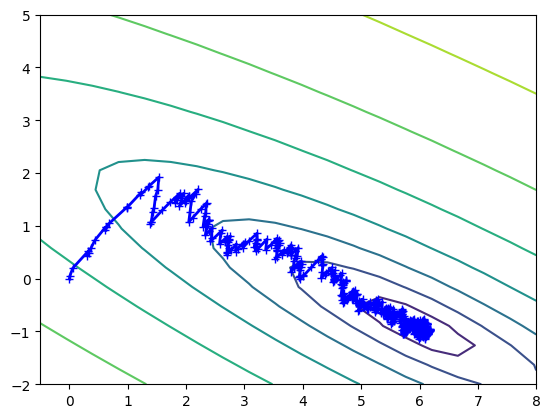

In [74]:
#Descente de gradient stochastique
Xe = make_mat_lin_biais(X_train) # dataset linéaire, transformation lineaire des données
wstar = np.linalg.solve(Xe.T@Xe,Xe.T@y_train)
print(wstar)

def descente_grad_stoc(X, y, eps=1e-3, nIterations=400):
    w = np.zeros(X.shape[1]) # init à 0
    allw = [w]
    for i in range(nIterations):
        k=np.random.randint(0,len(X))
        w=w-eps*(np.dot(2*X[k].T,(X[k]@w-y[k])))
        allw.append(w) # stockage de toutes les valeurs intermédiaires pour analyse
    allw = np.array(allw)
    return w, allw # la dernière valeur (meilleure) + tout l'historique pour le plot
    
w, allw = descente_grad_stoc(Xe, y_train, eps=5e-2, nIterations=700)
plot_parametres( allw, Xe, y_train, opti=wstar)


[ 5.95416586 -0.90341613]


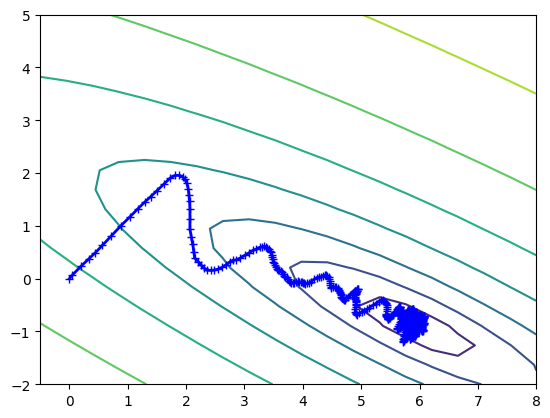

In [88]:
#Descente de gradient stochastique mome,t
Xe = make_mat_lin_biais(X_train) # dataset linéaire, transformation lineaire des données
wstar = np.linalg.solve(Xe.T@Xe,Xe.T@y_train)
print(wstar)

def descente_grad_stoc_momentum(X, y, eps=1e-3, gam=0.9,nIterations=400):
    w = np.zeros(X.shape[1]) # init à 0
    allw = [w]
    allgrad=[]
    #k=np.random.randint(0,len(X))
    #grad=np.dot(2*X[k].T,(X[k]@w-y[k]))
    grad=np.zeros(2)
    allgrad.append(grad)
    for i in range(nIterations):
        k=np.random.randint(0,len(X))
        grad=gam*allgrad[i]+eps*(np.dot(2*X[k].T,(X[k]@w-y[k])))
        w=w-grad
        allgrad.append(grad)
        allw.append(w) # stockage de toutes les valeurs intermédiaires pour analyse
    allw = np.array(allw)
    return w, allw # la dernière valeur (meilleure) + tout l'historique pour le plot

w, allw = descente_grad_stoc_momentum(Xe, y_train, eps=1e-2, gam=0.9,nIterations=700)
plot_parametres( allw, Xe, y_train, opti=wstar)
